In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [154]:
file_path = 'Groceries_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [155]:
len(df)

38765

(array([1.008e+04, 2.698e+03, 1.390e+03, 3.440e+02, 1.750e+02, 8.000e+01,
        1.450e+02, 5.000e+01, 0.000e+00, 1.000e+00]),
 array([ 2. ,  2.9,  3.8,  4.7,  5.6,  6.5,  7.4,  8.3,  9.2, 10.1, 11. ]),
 <BarContainer object of 10 artists>)

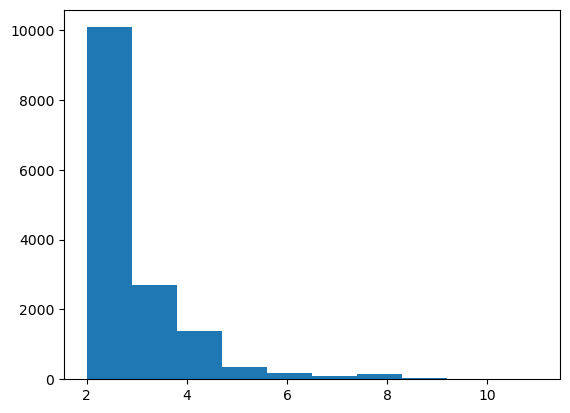

In [156]:
dist = [len(g) for k, g in df.groupby(['Member_number', 'Date'])]
plt.hist(dist)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [158]:
df.Member_number.nunique()

3898

In [159]:
df.itemDescription.nunique()

167

In [160]:
df.Date.nunique()

728

In [161]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [183]:
df.values.tolist()[:20]

[[1808, '21-07-2015', 'tropical fruit'],
 [2552, '05-01-2015', 'whole milk'],
 [2300, '19-09-2015', 'pip fruit'],
 [1187, '12-12-2015', 'other vegetables'],
 [3037, '01-02-2015', 'whole milk'],
 [4941, '14-02-2015', 'rolls/buns'],
 [4501, '08-05-2015', 'other vegetables'],
 [3803, '23-12-2015', 'pot plants'],
 [2762, '20-03-2015', 'whole milk'],
 [4119, '12-02-2015', 'tropical fruit'],
 [1340, '24-02-2015', 'citrus fruit'],
 [2193, '14-04-2015', 'beef'],
 [1997, '21-07-2015', 'frankfurter'],
 [4546, '03-09-2015', 'chicken'],
 [4736, '21-07-2015', 'butter'],
 [1959, '30-03-2015', 'fruit/vegetable juice'],
 [1974, '03-05-2015', 'packaged fruit/vegetables'],
 [2421, '02-09-2015', 'chocolate'],
 [1513, '03-08-2015', 'specialty bar'],
 [1905, '07-07-2015', 'other vegetables']]

In [163]:
transactions = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index(name='itemDescriptions')

In [164]:
transactions.head()

,Member_number,Date,itemDescriptions
0,1000,15-03-2015,"[sausage, whole milk, semi-finished bread, yog..."
1,1000,24-06-2014,"[whole milk, pastry, salty snack]"
2,1000,24-07-2015,"[canned beer, misc. beverages]"
3,1000,25-11-2015,"[sausage, hygiene articles]"
4,1000,27-05-2015,"[soda, pickled vegetables]"


In [184]:
transaction_descriptions = transactions['itemDescriptions'].tolist()
transaction_descriptions[:20]

[['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['whole milk', 'pastry', 'salty snack'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['soda', 'pickled vegetables'],
 ['frankfurter', 'curd'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['beef', 'white bread'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frozen vegetables', 'other vegetables'],
 ['butter', 'whole milk'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['sausage', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish']]

In [94]:
!pip install apyori

In [95]:
from apyori import apriori

In [185]:
rules = apriori(transaction_descriptions, min_support=0.0005,min_confidence = 0.05,min_lift = 1.5,min_length = 1.5)
results = list(rules)
results

[RelationRecord(items=frozenset({'whole milk', 'artif. sweetener'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'artif. sweetener'}), items_add=frozenset({'whole milk'}), confidence=0.2758620689655173, lift=1.7468151239657366)]),
 RelationRecord(items=frozenset({'canned beer', 'baking powder'}), support=0.0006014836596939117, ordered_statistics=[OrderedStatistic(items_base=frozenset({'baking powder'}), items_add=frozenset({'canned beer'}), confidence=0.0743801652892562, lift=1.5853994490358128)]),
 RelationRecord(items=frozenset({'beef', 'processed cheese'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'processed cheese'}), items_add=frozenset({'beef'}), confidence=0.05263157894736843, lift=1.5502486531288857)]),
 RelationRecord(items=frozenset({'beef', 'white wine'}), support=0.0006014836596939117, ordered_statistics=[OrderedStatistic(items_base=frozenset({'white wine'}), items_add=frozenset({

--------------------------------------------------

In [186]:
def inspect(results):
    rows = []
    for result in results:
        row = (
            tuple(result.ordered_statistics[0].items_base),
            tuple(result.ordered_statistics[0].items_add),
            result.support,
            result.ordered_statistics[0].confidence,
            result.ordered_statistics[0].lift
        )
        rows.append(row)
    return rows


In [187]:
results_df = pd.DataFrame(inspect(results), columns=['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [188]:
results_df.head()

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,"(artif. sweetener,)","(whole milk,)",0.000535,0.275862,1.746815
1,"(baking powder,)","(canned beer,)",0.000601,0.074380,1.585399
2,"(processed cheese,)","(beef,)",0.000535,0.052632,1.550249
3,"(white wine,)","(beef,)",0.000601,0.051429,1.514814
4,"(beverages,)","(sausage,)",0.001537,0.092742,1.536764


In [189]:
top_rules = results_df.loc[results_df['Lift'].nlargest(10).index]
top_rules

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
24,"(pickled vegetables,)","(ham,)",0.000535,0.059701,3.489506
25,"(soft cheese,)","(hamburger meat,)",0.000601,0.060000,2.745505
45,"(pork, sausage)","(whole milk,)",0.000601,0.391304,2.477819
33,"(sweet spreads,)","(pip fruit,)",0.000535,0.117647,2.398301
39,"(sweet spreads,)","(tropical fruit,)",0.000735,0.161765,2.387066
49,"(whipped/sour cream, rolls/buns)","(yogurt,)",0.000601,0.204545,2.381800
37,"(spices,)","(soda,)",0.000601,0.225000,2.317051
20,"(mustard,)","(frankfurter,)",0.000535,0.086957,2.302886
6,"(brandy,)","(whole milk,)",0.000869,0.342105,2.166281
54,"(whole milk, sausage)","(yogurt,)",0.001470,0.164179,1.911760
